In [11]:
#sesame street team
#load and wrangle colorado data
#July 9 2021
#v1

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport
#import missingno as msno
import random as rnd
import os

In [2]:
os.getcwd()

'C:\\Users\\Faiz\\Desktop\\_PEARC-desktop\\notebooks'

In [3]:
os.chdir('C:\\Users\\Faiz\\Desktop\\_PEARC-desktop\\data\\colorado')

In [4]:
vote = pd.read_excel('2020GEPrecinctLevelResultsPosted.xlsx') 
turnout = pd.read_excel('2020GEPrecinctLevelTurnoutPosted.xlsx')
primary = pd.read_excel('2020PresPrimaryResultsByCountyFINAL.xlsx')
abstract = pd.read_excel('StateAbstractResultsReport.xlsx')
co2014 = pd.read_csv('co_2014_heda.csv')

<ipython-input-4-7413c6ad5caf>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  vote = pd.read_excel('2020GEPrecinctLevelResultsPosted.xlsx')
<ipython-input-4-7413c6ad5caf>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  turnout = pd.read_excel('2020GEPrecinctLevelTurnoutPosted.xlsx')
<ipython-input-4-7413c6ad5caf>:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  primary = pd.read_excel('2020PresPrimaryResultsByCountyFINAL.xlsx')
<ipython-i

In [5]:
vote.head()

,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
0,Colorado,2020,G,Adams,4253001245,President/Vice President,Joseph R. Biden / Kamala D. Harris,Democratic Party,72,0,0
1,Colorado,2020,G,Adams,4253001245,President/Vice President,Donald J. Trump / Michael R. Pence,Republican Party,279,0,0
2,Colorado,2020,G,Adams,4253001245,President/Vice President,Don Blankenship / William Mohr,American Constitution Party,0,0,0
3,Colorado,2020,G,Adams,4253001245,President/Vice President,Bill Hammons / Eric Bodenstab,Unity Party of Colorado,0,0,0
4,Colorado,2020,G,Adams,4253001245,President/Vice President,Howie Hawkins / Angela Nicole Walker,Green Party,0,0,0


In [6]:
vote.describe()

,Year,Precinct,Candidate Votes,Yes Votes,No Votes
count,211946.0,2.119460e+05,211946.000000,211946.000000,211946.000000
mean,2020.0,4.080088e+09,94.949034,194.322861,108.247492
std,0.0,2.018841e+09,228.912782,315.032716,194.516744
min,2020.0,1.160116e+09,0.000000,0.000000,0.000000
25%,2020.0,2.171207e+09,0.000000,0.000000,0.000000
50%,2020.0,4.044418e+09,0.000000,0.000000,0.000000
75%,2020.0,6.263803e+09,8.000000,404.000000,176.000000
max,2020.0,7.253401e+09,2121.000000,2569.000000,1915.000000


In [ ]:
vote.dtypes

State                     object
Year                       int64
Election Type             object
County                    object
Precinct                   int64
Office/Issue/Judgeship    object
Candidate                 object
Party                     object
Candidate Votes            int64
Yes Votes                  int64
No Votes                   int64
dtype: object

In [ ]:
print(vote.nunique())

#19 parties!!!

State                        1
Year                         1
Election Type                1
County                      64
Precinct                  3205
Office/Issue/Judgeship     182
Candidate                  414
Party                       19
Candidate Votes           1560
Yes Votes                 1646
No Votes                  1313
dtype: int64


In [ ]:
print(vote)

           State  Year Election Type  ... Candidate Votes  Yes Votes No Votes
0       Colorado  2020             G  ...              72          0        0
1       Colorado  2020             G  ...             279          0        0
2       Colorado  2020             G  ...               0          0        0
3       Colorado  2020             G  ...               0          0        0
4       Colorado  2020             G  ...               0          0        0
...          ...   ...           ...  ...             ...        ...      ...
211941  Colorado  2020             G  ...               0         62      338
211942  Colorado  2020             G  ...               0        272      123
211943  Colorado  2020             G  ...               0        302       96
211944  Colorado  2020             G  ...               0        244      138
211945  Colorado  2020             G  ...               0        117      280

[211946 rows x 11 columns]


In [7]:
#checking for missing values
print(vote.isnull())

        State   Year  Election Type  County  Precinct  Office/Issue/Judgeship  \
0       False  False          False   False     False                   False   
1       False  False          False   False     False                   False   
2       False  False          False   False     False                   False   
3       False  False          False   False     False                   False   
4       False  False          False   False     False                   False   
...       ...    ...            ...     ...       ...                     ...   
211941  False  False          False   False     False                   False   
211942  False  False          False   False     False                   False   
211943  False  False          False   False     False                   False   
211944  False  False          False   False     False                   False   
211945  False  False          False   False     False                   False   

        Candidate  Party  C

In [8]:
vote.isna().sum().sum()

107456

In [ ]:
turnout.isna().sum().sum()

0

In [ ]:
primary.isna().sum().sum()

38

In [ ]:
abstract.isna().sum().sum()

5811

In [ ]:
msno.matrix(vote)

In [ ]:
#msno.heatmap(vote)

In [9]:
msno.bar(vote)

NameError: name 'msno' is not defined

In [10]:
#precinct selection, example only
is_245 =  vote['Precinct']== 4253001245
p245 = vote[is_245]

In [11]:
#party selectin
is_green = vote["Party"] == 'Green Party'
green = vote[is_green]

is_dem = vote["Party"] == 'Democratic Party'
dem = vote[is_dem]

is_repub = vote["Party"] == 'Republical Party'
repub = vote[is_repub]

#but there must be more than 3 parties (could be 19)!!! (reiew these a bit must to make sure they work, then bar graph at bottom)

In [ ]:
green.head()

,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
4,Colorado,2020,G,Adams,4253001245,President/Vice President,Howie Hawkins / Angela Nicole Walker,Green Party,0,0,0
30,Colorado,2020,G,Adams,4253001245,United States Senator,Bruce Lohmiller,Green Party,0,0,0
70,Colorado,2020,G,Adams,4255601241,President/Vice President,Howie Hawkins / Angela Nicole Walker,Green Party,0,0,0
96,Colorado,2020,G,Adams,4255601241,United States Senator,Bruce Lohmiller,Green Party,0,0,0
137,Colorado,2020,G,Adams,4255601246,President/Vice President,Howie Hawkins / Angela Nicole Walker,Green Party,6,0,0


In [ ]:
p245.head()

,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
0,Colorado,2020,G,Adams,4253001245,President/Vice President,Joseph R. Biden / Kamala D. Harris,Democratic Party,72,0,0
1,Colorado,2020,G,Adams,4253001245,President/Vice President,Donald J. Trump / Michael R. Pence,Republican Party,279,0,0
2,Colorado,2020,G,Adams,4253001245,President/Vice President,Don Blankenship / William Mohr,American Constitution Party,0,0,0
3,Colorado,2020,G,Adams,4253001245,President/Vice President,Bill Hammons / Eric Bodenstab,Unity Party of Colorado,0,0,0
4,Colorado,2020,G,Adams,4253001245,President/Vice President,Howie Hawkins / Angela Nicole Walker,Green Party,0,0,0


In [12]:
print(green.nunique())

State                        1
Year                         1
Election Type                1
County                      64
Precinct                  3205
Office/Issue/Judgeship       3
Candidate                    3
Party                        1
Candidate Votes             39
Yes Votes                    1
No Votes                     1
dtype: int64


In [13]:
#print(green.head())
print(green)
#6438 rows (green party) out of 211000)

           State  Year Election Type County    Precinct  \
4       Colorado  2020             G  Adams  4253001245   
30      Colorado  2020             G  Adams  4253001245   
70      Colorado  2020             G  Adams  4255601241   
96      Colorado  2020             G  Adams  4255601241   
137     Colorado  2020             G  Adams  4255601246   
...          ...   ...           ...    ...         ...   
211811  Colorado  2020             G   Yuma  4016563012   
211840  Colorado  2020             G   Yuma  4016563013   
211866  Colorado  2020             G   Yuma  4016563013   
211895  Colorado  2020             G   Yuma  4016563014   
211921  Colorado  2020             G   Yuma  4016563014   

          Office/Issue/Judgeship                             Candidate  \
4       President/Vice President  Howie Hawkins / Angela Nicole Walker   
30         United States Senator                       Bruce Lohmiller   
70      President/Vice President  Howie Hawkins / Angela Nicole Walke

In [ ]:
p245.describe()

,Year,Precinct,Candidate Votes,Yes Votes,No Votes
count,66.0,6.600000e+01,66.000000,66.000000,66.000000
mean,2020.0,4.253001e+09,31.469697,62.893939,55.181818
std,0.0,0.000000e+00,80.769038,88.565513,79.375235
min,2020.0,4.253001e+09,0.000000,0.000000,0.000000
25%,2020.0,4.253001e+09,0.000000,0.000000,0.000000
50%,2020.0,4.253001e+09,0.000000,0.000000,0.000000
75%,2020.0,4.253001e+09,1.750000,157.750000,129.750000
max,2020.0,4.253001e+09,284.000000,292.000000,267.000000


In [ ]:
print(p245.nunique())

State                      1
Year                       1
Election Type              1
County                     1
Precinct                   1
Office/Issue/Judgeship    21
Candidate                 55
Party                     19
Candidate Votes           18
Yes Votes                 23
No Votes                  22
dtype: int64


## Data Visualtions of Party spread

In [ ]:
#vote.hist(column='Party')

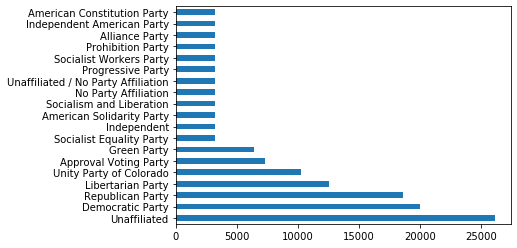

In [14]:
vote['Party'].value_counts()[:20].plot(kind='barh')

In [ ]:
vote["Party"].value_counts()
#hmmmm, 6 viable parties, and 'unaffiliated' category

Unaffiliated                           26134
Democratic Party                       19984
Republican Party                       18643
Libertarian Party                      12586
Unity Party of Colorado                10224
Approval Voting Party                   7276
Green Party                             6438
American Constitution Party             3205
Independent                             3205
Socialism and Liberation                3205
Socialist Workers Party                 3205
Progressive Party                       3205
Prohibition Party                       3205
No Party Affiliation                    3205
American Solidarity Party               3205
Socialist Equality Party                3205
Alliance Party                          3205
Independent American Party              3205
Unaffiliated / No Party Affiliation     3205
Name: Party, dtype: int64

In [15]:
#trick python, encode party
vote["Party"] = vote["Party"].astype('category')
vote["Party"] = vote["Party"].cat.codes
vote.dtypes

State                     object
Year                       int64
Election Type             object
County                    object
Precinct                   int64
Office/Issue/Judgeship    object
Candidate                 object
Party                       int8
Candidate Votes            int64
Yes Votes                  int64
No Votes                   int64
dtype: object

In [17]:
vote["Party"].value_counts()
#4 is dem, 12 is repub, 16 is unaffiliated, 8 is libertarian, 18 is unity, 3 is approval, 5 is green ! 
#7 groups!!!
#it is strange all the rest (12 of them) are 3205 ??

-1     72201
 16    26134
 4     19984
 12    18643
 8     12586
 18    10224
 3      7276
 5      6438
 17     3205
 15     3205
 14     3205
 13     3205
 0      3205
 11     3205
 1      3205
 9      3205
 7      3205
 6      3205
 2      3205
 10     3205
Name: Party, dtype: int64

In [18]:
vote.dtypes

State                     object
Year                       int64
Election Type             object
County                    object
Precinct                   int64
Office/Issue/Judgeship    object
Candidate                 object
Party                       int8
Candidate Votes            int64
Yes Votes                  int64
No Votes                   int64
dtype: object

In [19]:
vote.head()

,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
0,Colorado,2020,G,Adams,4253001245,President/Vice President,Joseph R. Biden / Kamala D. Harris,4,72,0,0
1,Colorado,2020,G,Adams,4253001245,President/Vice President,Donald J. Trump / Michael R. Pence,12,279,0,0
2,Colorado,2020,G,Adams,4253001245,President/Vice President,Don Blankenship / William Mohr,1,0,0,0
3,Colorado,2020,G,Adams,4253001245,President/Vice President,Bill Hammons / Eric Bodenstab,18,0,0,0
4,Colorado,2020,G,Adams,4253001245,President/Vice President,Howie Hawkins / Angela Nicole Walker,5,0,0,0


In [20]:
vote["Party"].value_counts()
#wtf is -1 (must be NAs - its the most), and why are many listed as 3205
#4 is dem, 12 is repub, 16 is 

-1     72201
 16    26134
 4     19984
 12    18643
 8     12586
 18    10224
 3      7276
 5      6438
 17     3205
 15     3205
 14     3205
 13     3205
 0      3205
 11     3205
 1      3205
 9      3205
 7      3205
 6      3205
 2      3205
 10     3205
Name: Party, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210A56E3640>]],
      dtype=object)

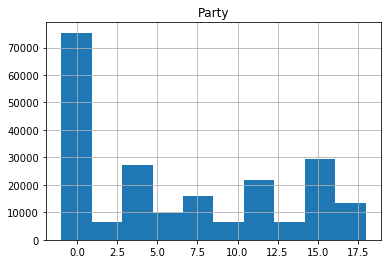

In [21]:
vote.hist(column='Party')

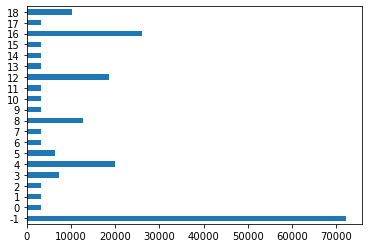

In [28]:
#anonymized parties
vote['Party'].value_counts()[:20].plot(kind='barh')

In [23]:
#check against orignal (for missing)
v2 = pd.read_excel('2020GEPrecinctLevelResultsPosted.xlsx') 

<ipython-input-23-1710af8edbc2>:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  v2 = pd.read_excel('2020GEPrecinctLevelResultsPosted.xlsx')


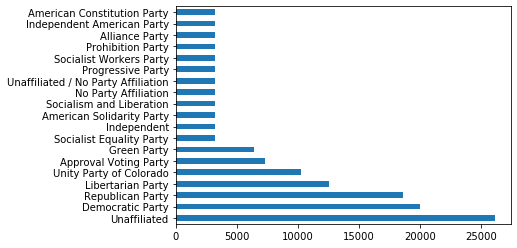

In [24]:
v2['Party'].value_counts()[:20].plot(kind='barh')

In [25]:
vote.isna().sum().sum()

35255

In [27]:
v2["Party"].value_counts()
#not sure what is getting encoded as -1 (72K)... will revist, at least the top 7 are correct

Unaffiliated                           26134
Democratic Party                       19984
Republican Party                       18643
Libertarian Party                      12586
Unity Party of Colorado                10224
Approval Voting Party                   7276
Green Party                             6438
Socialist Equality Party                3205
Independent                             3205
American Solidarity Party               3205
Socialism and Liberation                3205
No Party Affiliation                    3205
Unaffiliated / No Party Affiliation     3205
Progressive Party                       3205
Socialist Workers Party                 3205
Prohibition Party                       3205
Alliance Party                          3205
Independent American Party              3205
American Constitution Party             3205
Name: Party, dtype: int64